In [1]:
#!pip install yfinance
#!pip install yahoofinancials

import pandas as pd
import yfinance as yf


cosmos = yf.download('ATOM-USD',
                      start='2019-01-01',
                      end='2024-12-29',
                      progress=False,
)
cosmos.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ATOM-USD,ATOM-USD,ATOM-USD,ATOM-USD,ATOM-USD,ATOM-USD
Date,,,,,,
2019-03-14,6.526642,6.526642,6.639943,6.353963,6.439715,7318172
2019-03-15,7.504351,7.504351,7.715249,6.432468,6.633174,6057301
2019-03-16,7.383882,7.383882,8.305615,6.694531,7.507990,3477393
2019-03-17,4.776164,4.776164,7.357443,4.727895,7.357443,2653565
2019-03-18,5.110341,5.110341,5.229982,4.828242,4.828242,2567201


In [2]:
#Close price data
closing_price = cosmos[['Close']]

In [3]:
closing_price['Close']

Ticker,ATOM-USD
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2024-12-24,7.050850
2024-12-25,6.935168
2024-12-26,6.481401


In [4]:
import matplotlib.pyplot as plt

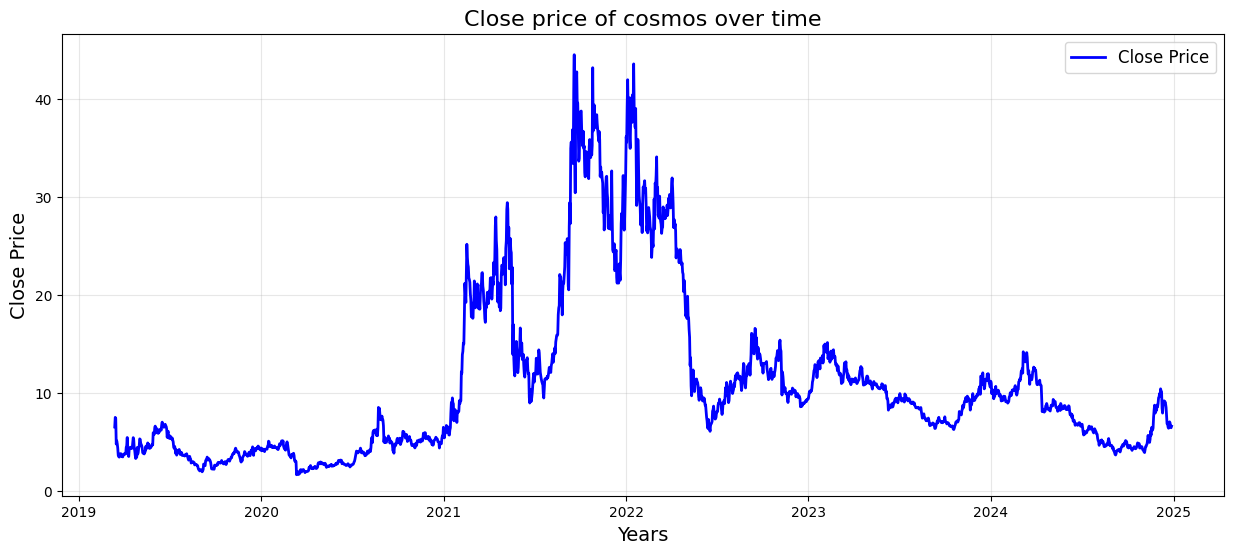

In [5]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of cosmos over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [6]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [7]:
df1 = pd.DataFrame(temp_data)

In [8]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [9]:
for i in range(2019, 2025):
    print(i, list(cosmos.index.year).count(i))

2019 293
2020 366
2021 365
2022 365
2023 365
2024 363


In [10]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-10-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-10-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


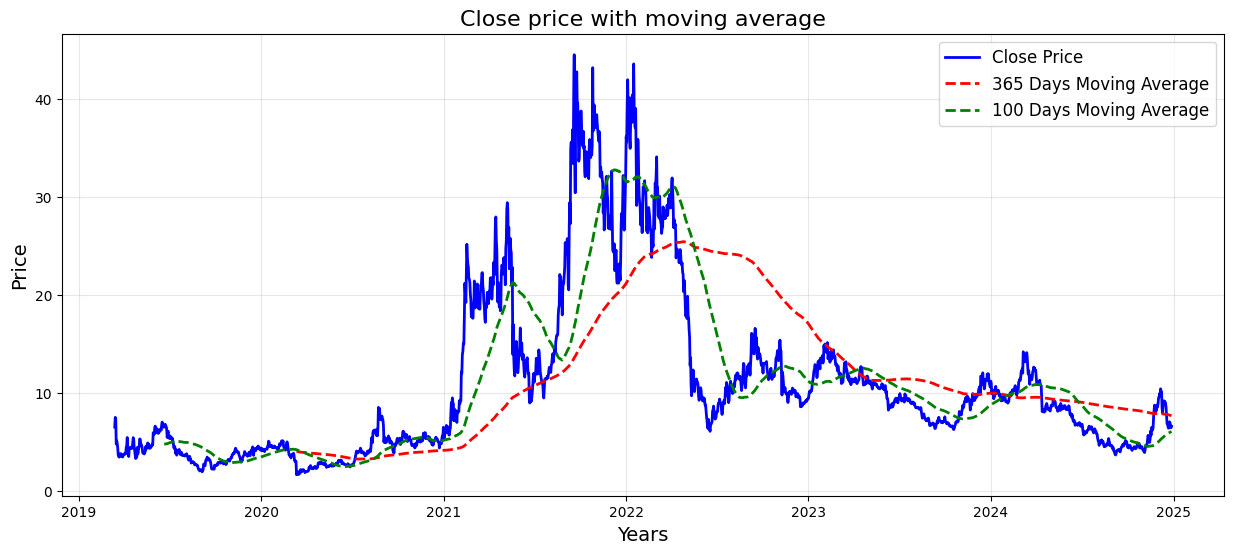

In [11]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [13]:
scaled_data = closing_price['Close'].dropna().values.reshape(-1, 1)

In [14]:
len(scaled_data)

2117

In [15]:
import numpy as np

In [16]:
# Prepare data
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
x_data = x_data.reshape(2017, 100)
y_data = np.array(y_data)

In [17]:
x_data.shape

(2017, 100)

In [18]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [19]:
x_train.shape

(1815, 100)

In [20]:
x_train[0]

array([6.52664185, 7.50435114, 7.38388205, 4.77616405, 5.11034107,
       4.8218832 , 4.38139486, 3.63294792, 3.49854589, 3.44551611,
       3.76524305, 3.77834105, 3.74390292, 3.77692103, 3.4923861 ,
       3.53983688, 3.46658492, 3.62432599, 3.72518301, 3.78719711,
       3.76695204, 3.7472949 , 3.80844307, 4.44735479, 4.61636114,
       5.45005178, 3.84409809, 3.74978304, 3.50981307, 4.3065362 ,
       4.30303717, 4.46268702, 4.3496151 , 4.41863108, 4.345788  ,
       4.36247778, 4.87611723, 5.43558311, 5.21581888, 4.3834691 ,
       4.12213087, 3.636693  , 3.30449796, 3.63343501, 3.43410206,
       4.43044519, 3.74783707, 3.93706989, 4.39012384, 4.5946579 ,
       5.3108449 , 5.25999212, 4.85370493, 4.72538185, 4.61352587,
       4.35483885, 3.89640689, 3.83291411, 4.01777983, 3.77299905,
       3.93692303, 3.99822903, 4.52906799, 4.27807903, 4.39643383,
       4.71370411, 4.89426613, 4.72470713, 4.77555895, 4.35909986,
       4.33500099, 4.47295284, 4.42470121, 4.50858402, 4.66984

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [23]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R^2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Linear Regression - MSE: 0.10443327888570049, R^2: 0.9572500977285934
Random Forest - MSE: 0.18118559012857588, R^2: 0.9258314365532736
Gradient Boosting - MSE: 0.11506131884026852, R^2: 0.9528994953703963


In [24]:
predictions = models['Linear Regression'].predict(x_test)

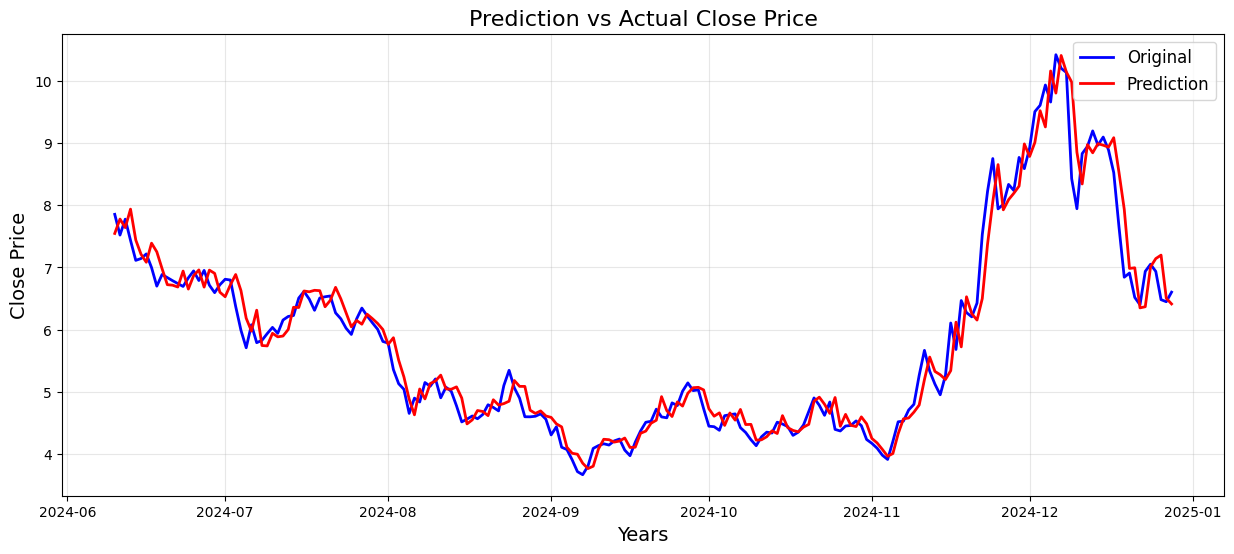

In [25]:
plotting_data = pd.DataFrame(
    {
        'Original': y_test.flatten(),
        'Prediction': predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [26]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1)
future_predictions=[]
for _ in range(10):
    next_days = models['Linear Regression'].predict(last_100)
    future_predictions.append(next_days)
    last_100 = np.append(last_100[:, 1:], next_days.reshape(1, 1), axis = 1)

In [27]:
future_predictions

[array([[6.46718029]]),
 array([[6.21898089]]),
 array([[6.25069665]]),
 array([[6.16867446]]),
 array([[6.29007044]]),
 array([[6.26914722]]),
 array([[6.35917009]]),
 array([[6.7794229]]),
 array([[6.93314676]]),
 array([[6.98709837]])]

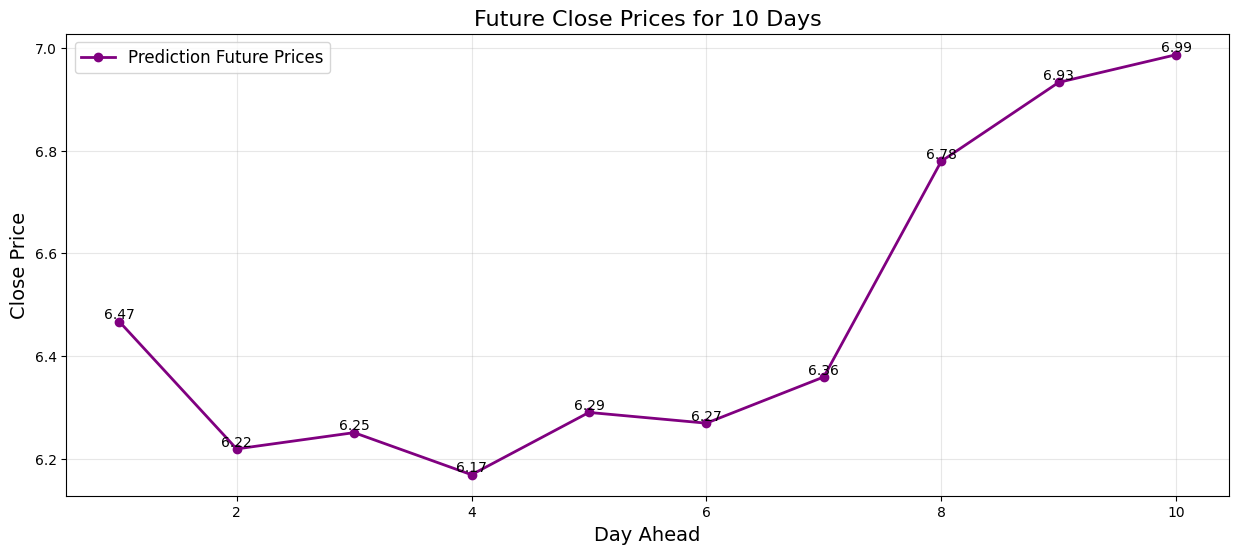

In [28]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [29]:
import joblib

# Save the model and scaler
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [30]:
from google.colab import files

# Download the saved files
files.download('linear_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# Save last_100 to a .npy file
np.save('last_100.npy', last_100)

# Download the saved file
files.download('last_100.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>